# Introduction

Copyright 2022 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM(TM) is a trademark of Moran Innovation LLC. All rights reserved.

**HOW TO USE THIS INTERACTIVE NOTEBOOK: Use the table of contents icon and sidebar at the left to navigate to the topic of interest. Change any of the input values and run the cell code.**

**CAUTION: None of the code cells run automatically. The user must manually run selected code cells in sequence to achieve the desired results. Default units are SI.**

**The reference report for this interactive notebook can be found at: https://drive.google.com/file/d/1sTNNPRgGdC4JrDt5UGz7pkyhoysBNkRZ/view.** 

**Please report any errata or other feedback to info@moraninnovation.com.**

## CryoFM

CryoFM is a library of functions useful for cryogenic fluid management. To access CryoFM from this notebook, use the "import CryoFM" command. Use the "dir(CryoFM)" command to get a list of the library functions.

In [6]:
import CryoFM

dir(CryoFM)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bond',
 'cp',
 'list_fluids',
 'reynolds']

For help on a particular function, use the "help(CryoFM.functionname)" command. Note that help can also be used for the entire CryoFM library but results in a very long text output.

In [10]:
import CryoFM

help(CryoFM.reynolds)

Help on function reynolds in module CryoFM:

reynolds(fluid, velocity, dim_char, temp, press)
    Reynolds number (ratio of inertia to viscous forces in a flowing fluid)
    
    Keyword arguments:
    fluid -- fluid type supported by CoolProp
    velocity -- fluid velocity, m/s
    dim_char -- characteristic dimension, m
                distance from leading edge for external flow, or
                hydraulic diameter for internal flow (4*area/wetted perimeter)
    temp -- fluid temperature, K
    press -- fluid pressure, Pa



CryoFM functions are invoked using "CryoFM.functionname(arguments)". Some examples:

In [18]:
import CryoFM

# Inputs
accel = 9.81e-6     # m/s^2, local acceleration at the interface
diam_fs = 6.6       # m, free surface diameter at the interface
pressure = 2e5      # Pa, saturation pressure at the interface
fluid = 'Oxygen'    # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Bond number
bond_number = CryoFM.bond(fluid, accel, diam_fs, pressure)
print("Bond number =", round(bond_number,1))

TypeError: bond() missing 1 required positional argument: 'surf_tens'

## Fluid Properties

The pressure vs temperature saturation curve along with key thermodynamic values for hydrogen, methane, and oxygen are shown below.

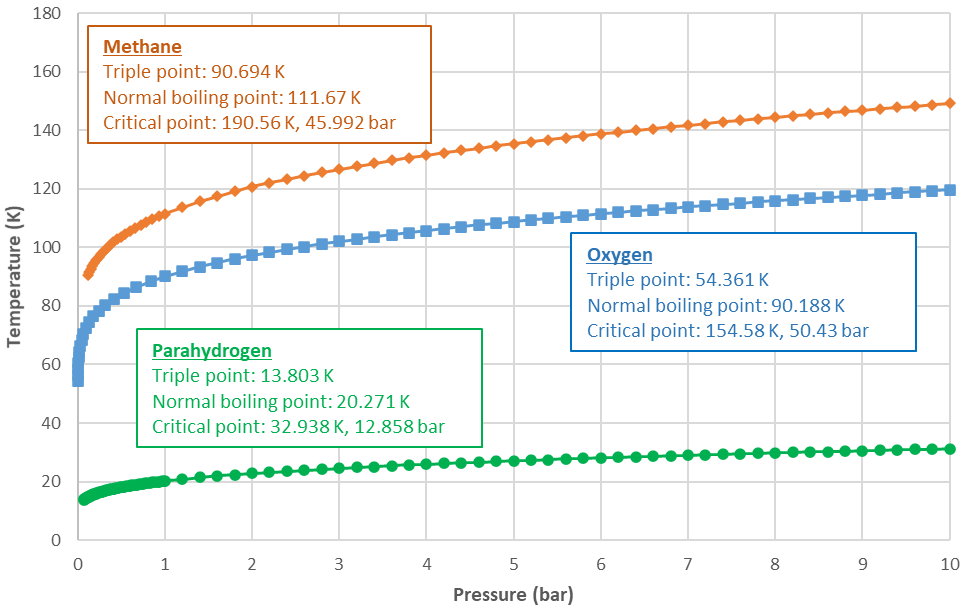

### CoolProp Lists

The open source CoolProp software is used in CryoFM for fluid properties evaluation. Details on the fluids and properties supported by CoolProp can be found at the links below.

*Fluids list: http://coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids

*Properties list: http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function

### Saturation Conditions

Some saturated properties used in CryoFM and the associated CoolProp calls are shown below for reference.

In [4]:
import CoolProp.CoolProp as cp  # for evaluating fluid thermophysical properties

# Saturation condition
fluid = 'Oxygen'  # http://www.coolprop.org/fluid_properties/PurePseudoPure.html
pressure = 2e5    # Pa, pressure

# Properties
density_liquid = cp.PropsSI('D', 'P', pressure, 'Q', 0, fluid)              # kg/m^3, saturated liquid density 
density_vapor = cp.PropsSI('D', 'P', pressure, 'Q', 1, fluid)               # kg/m^3, saturated vapor density
surf_tension = cp.PropsSI('surface_tension', 'P', pressure, 'Q', 0, fluid)  # N/m, saturated surface tension
temp_sat = cp.PropsSI('T', 'P', pressure, 'Q', 0, fluid)                    # K, saturation temperature

# Results
results = {"temp_sat": temp_sat, "density_liquid": density_liquid, "density_vapor": density_vapor, 
           "surf_tension": surf_tension}
print(results)

{'temp_sat': 97.23553533356629, 'density_liquid': 1105.401189711224, 'density_vapor': 8.354467802255993, 'surf_tension': 0.011405531150268775}


### Specific State Points

Some state point properties used in CryoFM and the associated CoolProp calls are shown below for reference.

In [5]:
import CoolProp.CoolProp as cp    # for evaluating fluid thermophysical properties

# State points
fluid = 'Oxygen'  # http://www.coolprop.org/fluid_properties/PurePseudoPure.html
temp = 97         # K, temperature
pressure = 2e5    # Pa, pressure

# Properties
density = cp.PropsSI('D', 'T', temp, 'P', pressure, fluid)       # kg/m^3, fluid density
phase = cp.PhaseSI('T', temp, 'P', pressure, fluid)              # based on state point inputs
visc_dynamic = cp.PropsSI('V', 'T', temp, 'P', pressure, fluid)  # Pa-s, dynamic viscosity
prandtl = cp.PropsSI('Prandtl', 'T', temp, 'P', pressure, fluid)  # prandtl number

# Results
results = {"phase": phase, "density": density, "visc_dynamic": visc_dynamic, "prandtl": prandtl}
print(results)

{'phase': 'liquid', 'density': 1106.6351294355363, 'visc_dynamic': 0.0001638895690225786, 'prandtl': 2.004098847592044}


## Dimensionless Numbers

Dimensionless numbers are used for heat transfer and fluid dynamic analysis. Here are the dimensionless numbers available from the CryoFM library:

### Bond Number

In [6]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
accel = 9.81e-6     # m/s^2, local acceleration at the interface
diam_fs = 6.6       # m, free surface diameter at the interface
press = 2e5         # Pa, saturation pressure at the interface
fluid = 'Oxygen'    # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
dens_liq = cp.PropsSI('D', 'P', press, 'Q', 0, fluid)  # kg/m^3
dens_vap = cp.PropsSI('D', 'P', press, 'Q', 1, fluid)  # kg/m^3
surf_tens = cp.PropsSI('surface_tension', 'P', press, 'Q', 0, fluid)  # N/m

# Bond number
bond = CryoFM.bond(accel, diam_fs, dens_liq, dens_vap, surf_tens)
print("Bond number =", round(bond,1))

Bond number = 41.1


### Reynolds Number

In [7]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
length = 0.1        # m, characteristic length or hydraulic diameter = 4*area/wetted perimeter
velocity = 10       # m/s, fluid velocity
temp = 97           # K, bulk fluid temperature
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen'    # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
dens = cp.PropsSI('D', 'T', temp, 'P', press, fluid)  # kg/m^3
visc_dyn = cp.PropsSI('V', 'T', temp, 'P', press, fluid)  # Pa-s

# Reynolds number
reynolds = CryoFM.reynolds(velocity, length, dens, visc_dyn)
print("Reynolds number =", "{:.5e}".format(reynolds))

Reynolds number = 6.75232e+06


### Prandtl Number

In [9]:
import CoolProp.CoolProp as cp

# Inputs
temp = 97           # K, bulk fluid temperature
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen'    # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Prandtl number
prandtl = cp.PropsSI('Prandtl', 'T', temp, 'P', pressure, fluid)
print(round(prandtl,2))

2.0


### Raleigh Number

### Nusselt Number

## Environments

# Passive CFM

## Tankage

## Venting

## Pressurization

## Chilldown and Filling

## Radiation Shields

# Active CFM

## Broad Area Cooling (BAC)

### Cooling Flow

For a given cooling load, the required flow in the BAC to provide that cooling can be estimated by:
* Identifying the cooling gas, its average operating pressure, and inlet temperature
* Specifying the cooling load needed
* Estimating the temperature drop from outlet to inlet of the BAC (e.g, based on past designs)

In [8]:
import CoolProp.CoolProp as cp # for evaluating fluid thermophysical properties

# Inputs
fluid = 'Helium'     # cooling fluid
cooling_load = 187.6 # W, cooling to be provided
pressure = 10e5      # Pa, average pressure of cooling fluid
temp_avg = 86.55     # K, average cooling fluid temperature
temp_delta = 3.1     # K, cooling fluid temperature difference (outlet - inlet)

 
def mdot_bac(fluid, cooling_load, pressure, temp_avg, temp_delta):
    """Mass flow rate of broad area cooling (BAC) loop in g/s"""
    # Specific heat capacity of the cooling gas, J/kg-K
    c_p = cp.PropsSI("C", "T", temp_avg, "P", pressure, fluid)
    # Mass flow rate, g/s
    massflow = cooling_load / c_p / temp_delta
    # Print results
    print("Required", fluid, "mass flow =", "{:.2e}".format(massflow), "kg/s")
    return

# Results
result = mdot_bac(fluid, cooling_load, pressure, temp_avg, temp_delta)


Required Helium mass flow = 1.16e-02 kg/s


### Thermal Performance

If the BAC loop is comprised of tubing mounted to a surface such as the tank wall or an intermediate shield, thermal performance can be estimated using a single stream heat exchanger analysis. The outlet temperature can then be calculated directly rather than assuming a value based on previous designs or experience. Note that this analysis assumes a constant temperature boundary on the tubing external wall.

In [9]:
import math
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
fluid = 'Helium'    # cooling fluid
mdot_tube = 1.93e-4 # kg/s, cooling fluid mass flow per tube
id = 0.0127         # m, inside diameter of cooling tube
length = 3.556      # m, cooling tube length
temp_in = 85.0      # K, cooling fluid inlet temperature
temp_avg = 87.5     # K, average cooling fluid temperature
press_avg = 10e5    # Pa, average cooling fluid pressure
temp_wall = 90      # K, wall/shield temperature (assumed constant)

def hx_single_stream(fluid, mdot_tube, id, length, temp_in, temp_avg, 
                     press_avg, temp_wall):
    """Single stream heat exchanger with constant wall temperature
    
    Refr: Lienhard, A Heat Transfer Textbook, 4th ed., 2017
    """

    # Properties
    density = cp.PropsSI('D', 'T', temp_avg, 'P', press_avg, fluid)  # kg/m^3
    prandtl = cp.PropsSI('Prandtl', 'T', temp_avg, 'P', press_avg, fluid)
    conductivity = cp.PropsSI('conductivity', 'T', temp_avg, 'P', press_avg,
                              fluid) # W/m-K
    c_p = cp.PropsSI('C', 'T', temp_avg, 'P', press_avg, fluid) # J/kg-K


    # Flow area, perimeter, velocity, and Reynolds number
    area = math.pi / 4 * id**2  # m^2
    perimeter = math.pi * id
    velocity = mdot_tube / density / area  # m/s
    reynolds = CryoFM.reynolds(fluid, velocity, id, temp_avg, press_avg)

    # Friction factor and Nusselt number
    if reynolds < 2300:  # laminar
        flow = 'laminar'
        ffactor = 64 / reynolds
        nusselt = 3.657
    else:  # turbulent; 2300 < Re < 5e6
        flow = 'turbulent'
        ffactor = 1/((1.82 * math.log10(reynolds) - 1.64)**2)
        nusselt = (ffactor/8 * (reynolds-1000) * prandtl / 
                  (1 + 12.7*math.sqrt(ffactor/8) * (prandtl**(2/3) - 1)))

    # Corrected friction factor and Nusselt for variable fluid properties
    tratio = temp_avg / temp_wall
    f_corr = ffactor * (tratio)**0.23
    if tratio < 0.14 or tratio > 3.3: # caution message
        print("Caution: fluid-to-wall temperature ratio out of range for \
              corrected friction factor correlation used")
    if temp_wall > temp_avg:
        n = 0.47
    else:
        n = 0
    nu_corr = nusselt * (tratio)**n

    # Heat transfer coefficient and outlet temperature
    ht_coeff = nu_corr * conductivity / id  # W/m^2-K
    temp_out = ((temp_wall - temp_in) * 
                (1 - math.exp(-ht_coeff*perimeter*length/mdot_tube/c_p))
                + temp_in)

    # Print selected results
    if reynolds > 5e6: # out of range caution
        print("Caution: Reynolds number above stated range for Nusselt \
              correlation used")
    print("Properties: density =", round(density,2), "kg/m^3, Prandtl =", 
          round (prandtl,3), ", conductivity =", "{:.3e}".format(conductivity),
          "W/m-K, Cp =", round(c_p,2), "J/kg-K\n")
    print("Flow: area =", "{:.3e}".format(area), "m^2, velocity =", 
          round(velocity,2), "m/s, perimeter =", "{:.3e}".format(perimeter), 
          "m, Reynolds =", "{:.3e}".format(reynolds), flow, end='\n\n')
    print("Other parameters: friction factor (corrected) =", 
          "{:.3e}".format(f_corr), ", Nusselt number (corrected) =", 
          "{:.3e}".format(nu_corr), end='\n\n')
    print("Results: heat transfer coefficient:", round(ht_coeff,2), 
          "W/m^2-K, outlet temp =", round(temp_out,2))
    return

# Call function
hx_single_stream(fluid, mdot_tube, id, length, temp_in, temp_avg, press_avg, 
                 temp_wall)

Properties: density = 5.42 kg/m^3, Prandtl = 0.696 , conductivity = 6.836e-02 W/m-K, Cp = 5216.74 J/kg-K

Flow: area = 1.267e-04 m^2, velocity = 0.28 m/s, perimeter = 3.990e-02 m, Reynolds = 2.123e+03 laminar

Other parameters: friction factor (corrected) = 2.996e-02 , Nusselt number (corrected) = 3.609e+00

Results: heat transfer coefficient: 19.43 W/m^2-K, outlet temp = 89.68


### Wall or Shield dT

### Manifolds Sizing

### Pressure Drop

## Mixing

# Supplemental

## Verification Tests

In [10]:
if(abs(bond(9.81E-6, 6.6, 1105.401189711224, 8.354467802255993, 0.011405531150268775) - 41.1)) > 0.1:
    print("FAILED: bond function verification case")
else:
    print("PASSED: bond function verification case")

if(abs(reynolds(1106.6351294355363, 10, 0.1, 0.0001638895690225786) - 6.752322E6)) > 0.1:
    print("FAILED: reynolds function verification case")
else:
    print("PASSED: reynolds function verification case")
        

PASSED: bond function verification case
PASSED: reynolds function verification case


## Binder

Setting it up from GitHub: https://github.com/Build-a-binder/build-a-binder.github.io/blob/master/workshop/10-zero-to-binder.md

## Pint

website: https://pint.readthedocs.io/en/stable/


In [11]:
import pint

# Mixed units math
units = pint.UnitRegistry()
sum = 3 * units.m + 4 * units.cm
print(sum)

# Unit conversions
length = 1 * units.m
print(length.to(units.ft))

# Specify value and units    
value = units.Quantity
length = value('2.54 cm')
print(length)

3.04 meter
3.2808398950131235 foot
2.54 centimeter


## Code Snippets

In [12]:
# Full printing of inputs and properties from bond and raleigh functions
print("Inputs: fluid =", fluid, ", pressure =", "{:.3e}".format(pressure), "Pa", ", free surface diameter =",
      round(diam_fs, 3), "m", ", acceleration =", "{:.3e}".format(accel), "m/s^2", ", liquid density =", 
      round(density_liquid, 1), "kg/m^3", ", vapor density =", round(density_vapor,4), "kg/m^3", 
      ", surface tension =", "{:.5e}".format(surf_tension), "N/m", end='\n\n')
print("Inputs: fluid =", fluid, ", pressure =", "{:.3e}".format(pressure), "Pa", ", fluid temperature =",
      round(temp, 2), "K", ", characteristic dimension =", round(length, 3), "m", ", fluid velocity =", 
      round(velocity, 3), "m/s", ", fluid density =", "{:.5e}".format(density), "kg/m^3",
      ", dynamic viscosity =", "{:.5e}".format(visc_dynamic), "Pa-s", end='\n\n')

Inputs: fluid = Helium , pressure = 1.000e+06 Pa , free surface diameter = 6.6 m , acceleration = 9.810e-06 m/s^2 , liquid density = 1105.4 kg/m^3 , vapor density = 8.3545 kg/m^3 , surface tension = 1.14055e-02 N/m

Inputs: fluid = Helium , pressure = 1.000e+06 Pa , fluid temperature = 97 K , characteristic dimension = 2.54 centimeter m , fluid velocity = 10 m/s , fluid density = 1.10664e+03 kg/m^3 , dynamic viscosity = 1.63890e-04 Pa-s

